# Introduction

In the following notebook, I will be preprocessing our raw data and engineering new features to build a simple prediction model.

**Import Libraries**

In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import yaml
import os

**Set Notebook Preferences**

In [53]:
#Set pandas preferences
pd.set_option('display.max_columns', 100)

#Set visualization preferences
plt.style.use('ggplot')

fontdict= {'title_fontsize':16,
           'label_fontsize':12}

**Read-in Data**

In [54]:
#Change directory to my_config.yaml
os.chdir('C:/Users/kishe/Documents/Data Science/Projects/Python/In Progress/Car_Price_Prediction')

#Read yaml file
from box import Box

with open('my_config.yaml') as file:
    yaml_data= Box(yaml.safe_load(file))

#Read in raw data
raw_data= pd.read_csv(yaml_data.base.path.data, dtype={'symboling':'category'})

## View Visualizations from EDA

In [55]:
#Set path to figures file to load images
path = 'C:/Users/kishe/Documents/Data Science/Projects/Python/In Progress/Car_Price_Prediction/Reports/Figures/'



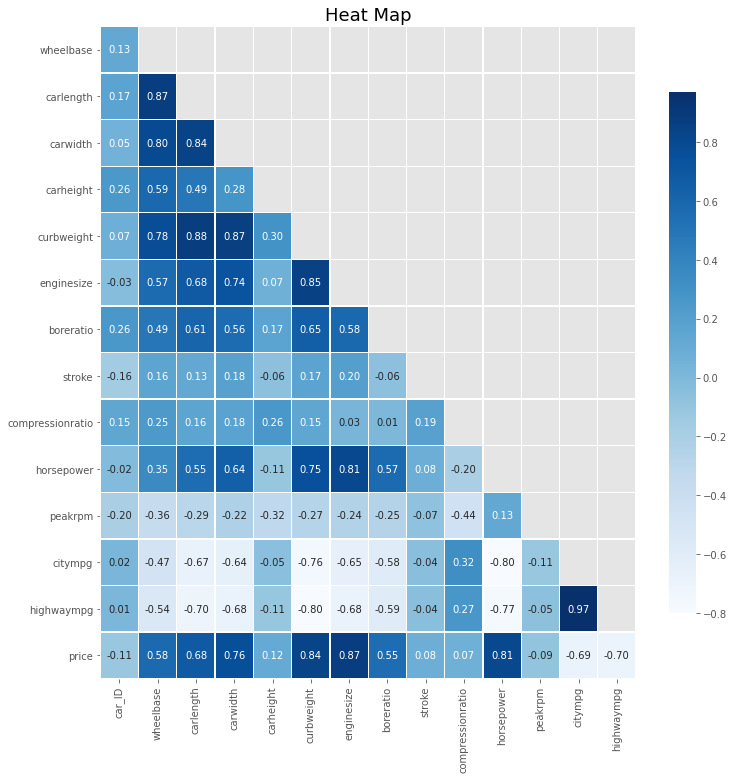

In [56]:
#Import library
from IPython.display import Image

# Load visualizations from local storage
Image(filename = path + "RawDataHeatmap.png", width = 600, height = 300)

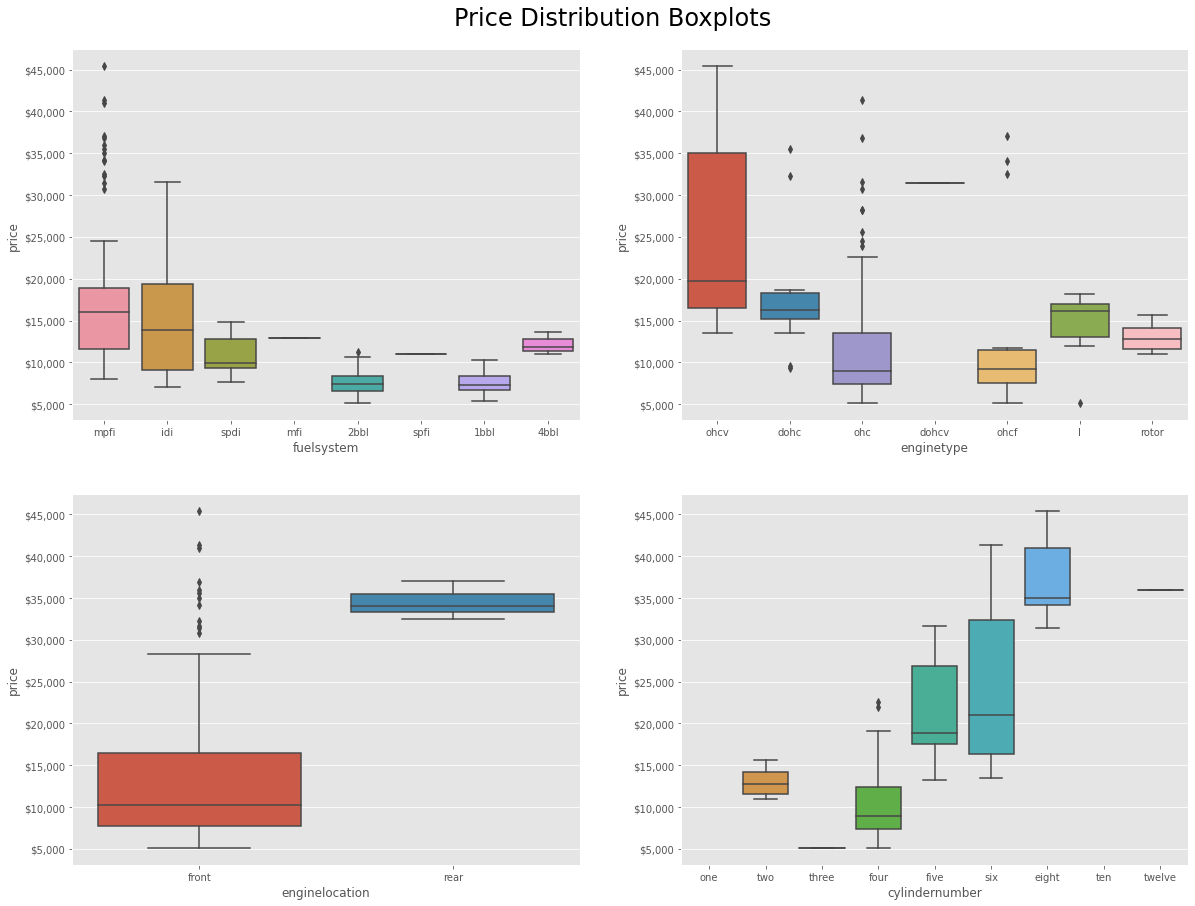

In [57]:
Image(filename = path + "RawDataBoxplot.png", width = 600, height = 500)

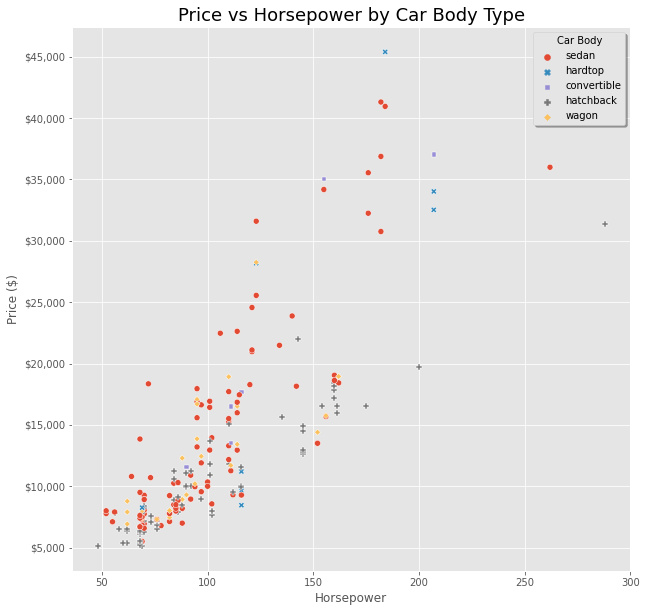

In [58]:
Image(filename = path + "RawDataScatterplot.png", width = 600, height = 600)

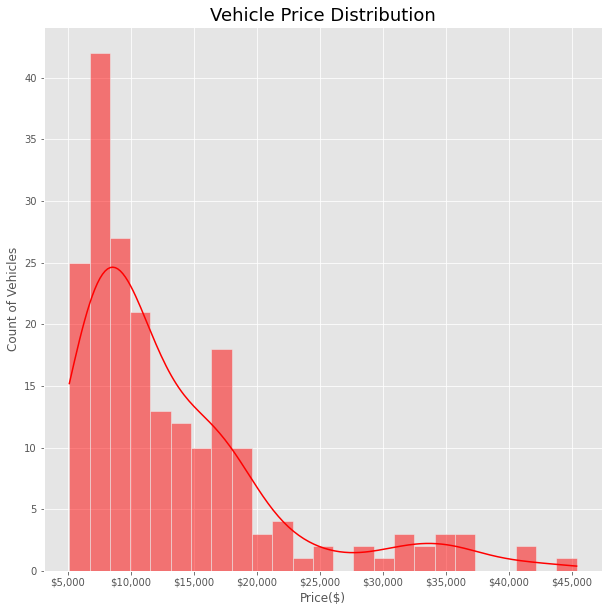

In [59]:
Image(filename = path + "RawDataPriceDistribution.png", width = 600, height = 300)

# Data Cleaning

**Remove cols of no particular use or interest**

In [60]:
#Remove car ID's and name
processed_data = raw_data.drop(['car_ID', 'CarName'], axis= 1)

#Preview
processed_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
1,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
2,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
3,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
4,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0


## Testing

In [61]:
#Import modules
import src
from src.Features.feature_engineering import Tests

**Check for Skew**

In [62]:
#Init tests object using processed data
processed_tests = Tests(processed_data)

#View Skew
processed_tests.skew_measurement()

wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

**Calculate VIF Score: Check for Multicollinearity**

In [63]:
#Import modules
import src
from src.Features.feature_engineering import Tests

#Reload - Remove later
import importlib
importlib.reload(src.Features.feature_engineering)
from src.Features.feature_engineering import Tests


#Init tests object using raw data


#View VIF scores
processed_tests.variance_inflation_score()

const               4937.381395
citympg               27.589928
highwaympg            24.482301
curbweight            16.514490
carlength              9.566268
enginesize             9.166569
horsepower             8.403745
wheelbase              7.398201
price                  6.702086
carwidth               5.709889
compressionratio       2.322776
carheight              2.222671
peakrpm                2.188544
boreratio              2.111655
stroke                 1.290883
dtype: float64

In [64]:
#Remove citympg, curbweight
processed_tests.data= processed_tests.data.drop(['citympg','curbweight','enginesize', 'carlength'], axis= 1)

In [65]:
#Rerun VIF test
display(processed_tests.variance_inflation_score())

#We'll keep these features for now
processed_data = processed_tests.data

const               4717.866741
horsepower             5.768661
wheelbase              5.320102
carwidth               5.233313
price                  4.566412
highwaympg             3.898998
boreratio              2.049209
carheight              1.997917
compressionratio       1.774675
peakrpm                1.557413
stroke                 1.168704
dtype: float64

# Feature Engineering

### Target

**Check for normality and apply transformation if needed**

In [66]:
from src.Features.feature_engineering import Transformations

#Init Transformations class
target_testing = Transformations(processed_data)

#Apply shapiro-wilks test on target
target_testing.shapiro_wilks('price') #Target is not normal

#Create dataframe to store transformed target features in 
transformations= pd.DataFrame()

#Apply transformations to target and append to transformations dataframe
transformations['square_root']= target_testing.square_root('price')
transformations['cube_root']= target_testing.cube_root('price')
transformations['log']= target_testing.log_transformation('price')
transformations['boxcox'], _= (target_testing.boxcox_transformation('price'))

#Convert transformations to object
transformed_target = Tests(transformations)

#Apply shapiro test to all columns
for col in list(transformed_target.data.columns):
    transformed_target.shapiro_wilks(col)

Shapiro statistic for price: 0.8006654381752014
P-Value: 1.8491777441833604e-15

Shapiro statistic for square_root: 0.8879932165145874
P-Value: 3.1418912610492455e-11

Shapiro statistic for cube_root: 0.9117160439491272
P-Value: 1.0586796994616066e-09

Shapiro statistic for log: 0.9486748576164246
P-Value: 1.0736105195974233e-06

Shapiro statistic for boxcox: 0.9783729910850525
P-Value: 0.002997214440256357



In [67]:
#Update price with boxcox data
processed_data['price'] = transformations['boxcox']

### Features

**Check for linear relationships between features and target**

['wheelbase', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg', 'price']


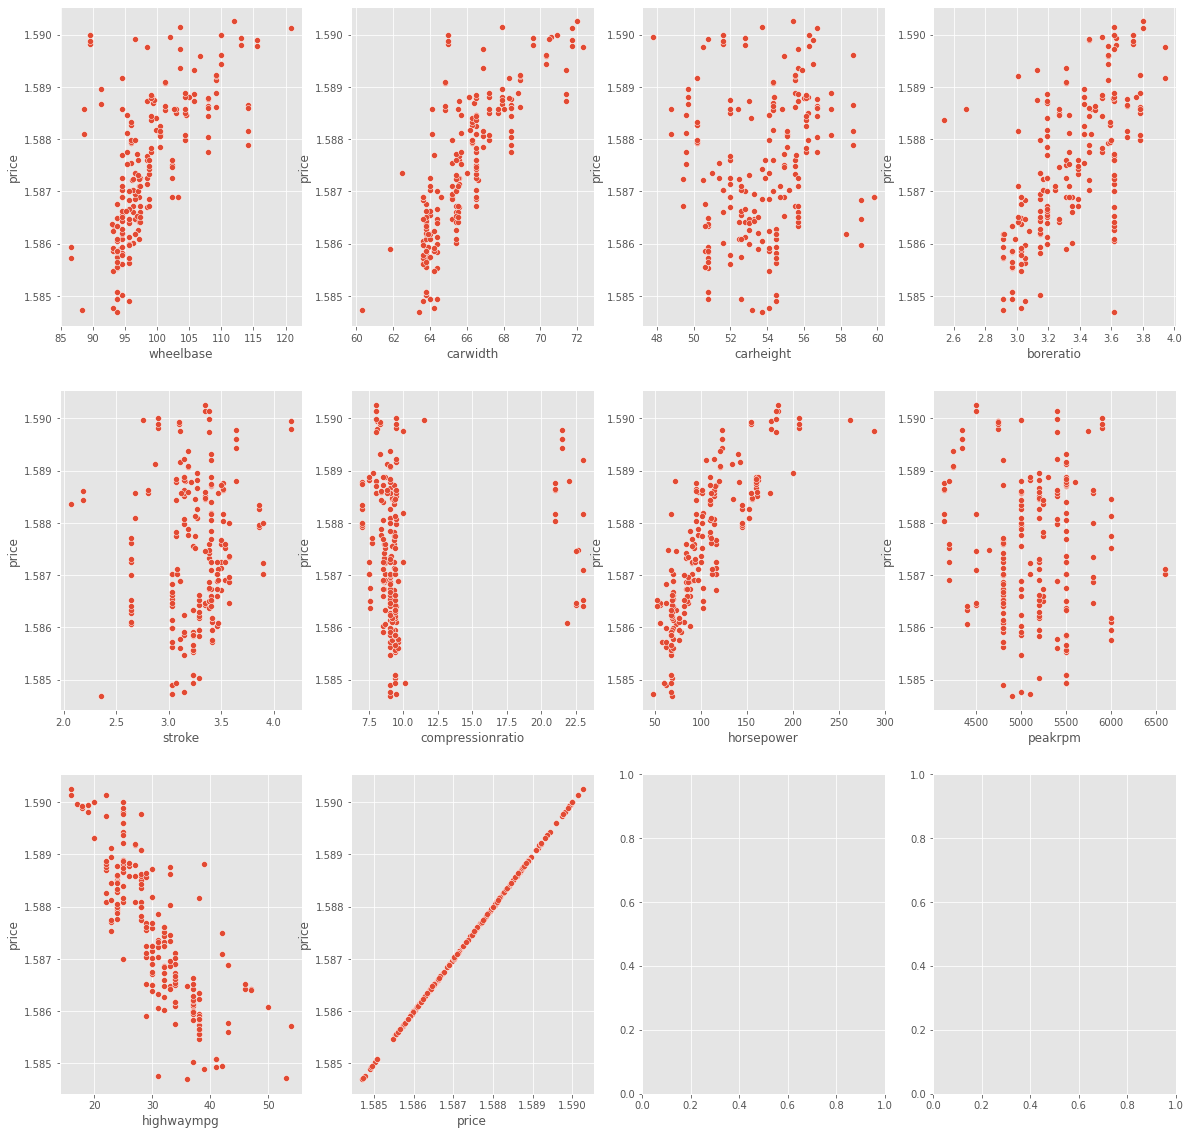

In [68]:
#Import visualizations
from src.Visualization.visualize import EDA_Viz

#Init EDA_Viz object
viz = EDA_Viz(processed_data, color = 'green')

#Subset numeric cols
numerics = list(viz.dataframe.select_dtypes(include= ['float64', 'int64']))
print(numerics)

#Create plot
f, axes = plt.subplots(3,4,figsize = (20,20))

#Plot data
for col, ax in zip(numerics,axes.flatten()):
    viz.scatterplot(x=col, y = 'price', ax=ax)

# Export Processed Data

In [69]:
#Check processed_df
print('Processed data shape:', processed_data.shape)
display(processed_data.head())

Processed data shape: (205, 20)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,0,gas,std,two,sedan,rwd,front,102.0,70.6,47.8,ohcv,twelve,mpfi,3.54,2.76,11.5,262,5000,17,1.589962
1,0,gas,std,four,sedan,rwd,front,120.9,71.7,56.7,ohcv,eight,mpfi,3.80,3.35,8.0,184,4500,16,1.590133
2,1,gas,std,two,hardtop,rwd,front,112.0,72.0,55.4,ohcv,eight,mpfi,3.80,3.35,8.0,184,4500,16,1.590259
3,0,gas,std,four,sedan,rwd,front,113.0,69.6,52.8,dohc,six,mpfi,3.63,4.17,8.1,176,4750,19,1.589806
4,0,gas,std,four,sedan,rwd,front,113.0,69.6,52.8,dohc,six,mpfi,3.63,4.17,8.1,176,4750,19,1.589945


In [70]:
#Set path to write file
path = r'Data/Processed_Data/'

#Write processed_df to csv
processed_data.to_csv(path + "20201027_ProcessedData.csv")